In [1]:
# Linear Regression
# - Step 1: matrix formula
# - Step 2: gradient descent
# - step 3: old school (closed form)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from mathism import transpose, matrix_inverse


In [4]:
from mathism import mat_mul

In [7]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.X = None
        self.y = None
        self.theta = None

    def fit_closedForm(self, X: list[list[float | int]], y: list[float | int]):
        # Save the original X for predictions later
        self.X = X
        # Add bias term to X without modifying the original data
        X_bias = [[1] + row for row in X]  # Create a new list with bias term
        
        # Matrix inverse using the methods you've written in mathism.py
        print("Original X:", X)
        X_transposed = transpose(X_bias)
        print("Transposed X:", X_transposed)
        XtX = mat_mul(X_transposed, X_bias)
        print("XtX:", XtX)
        XtX_inv = matrix_inverse(XtX)
        print("XtX_inv:", XtX_inv)
        XtX_inv_Xt = mat_mul(XtX_inv, X_transposed)
        print("XtX_inv_Xt:", XtX_inv_Xt)

        # Solving for theta
        self.theta = mat_mul(XtX_inv_Xt, [[val] for val in y])


    def fit_openForm(self, X: list[list[float | int]], y: list[float | int]):
        # Save the original X for predictions later
        self.X = X
        # Add bias term to X without modifying the original data

    def fit_gradientDescent(self, X: list[list[float | int]], y: list[float | int]):
        X_bias = [[1] + row for row in X]
        m = len(X_bias)
        n = len(X_bias[0])

        # Initialize theta (weights) to zeros
        self.theta = [0.0] * n

        # Perform gradient descent
        for iteration in range(self.iterations):
            # Step 1: Calculate predictions (y_hat) for all samples
            y_hat = [sum(self.theta[j] * X_bias[i][j] for j in range(n)) for i in range(m)]
            # Step 2: Compute the gradient
            gradient = [0.0] * n
            for j in range(n):
                gradient[j] = (1 / m) * sum((y_hat[i] - y[i]) * X_bias[i][j] for i in range(m))

            # Step 3: Update theta using the gradient
            self.theta = [self.theta[j] - self.learning_rate * gradient[j] for j in range(n)]


    def predict(self, X: list[list[float | int]]):
        # Add bias term to the new X for prediction
        X_bias = [[1] + row for row in X]  # Create a new list with bias term
        predictions = mat_mul(X_bias, self.theta)  # Predict
        return [row[0] for row in predictions]  # Flatten result


In [8]:
# Generate synthetic housing price data
def generate_housing_data(n_samples: int = 10, noise_level: float = 0.1) -> tuple[list[list[float]], list[float]]:
    import random
    random.seed(42)  # For reproducibility
    
    X = []
    y = []
    
    price_per_sqft = 200
    price_per_bedroom = 50000
    
    for _ in range(n_samples):
        sqft = random.uniform(1000, 3000)
        bedrooms = random.randint(2, 5)
        base_price = (sqft * price_per_sqft + bedrooms * price_per_bedroom)
        noise = random.uniform(-noise_level, noise_level) * base_price
        price = base_price + noise
        
        X.append([sqft, bedrooms])
        y.append(price)
    
    return X, y

# Generate the data
X_train, y_train = generate_housing_data(10)

# Create and train the model
model = LinearRegression()
model.fit_closedForm(X_train, y_train)

# Generate test data
X_test, y_test = generate_housing_data(3)

# Make predictions
predictions = model.predict(X_test)

# Print results
print("\nTraining Data:")
print("X (features):")
for i, features in enumerate(X_train):
    sqft, beds = features
    print(f"House {i + 1}: {sqft:.0f} sq.ft, {beds} bedrooms -> ${y_train[i]:,.2f}")

print("\nModel Parameters:")
print(f"Bias (θ₀): ${model.theta[0][0]:,.2f}")
print(f"Price per sq.ft (θ₁): ${model.theta[1][0]:,.2f}")
print(f"Price per bedroom (θ₂): ${model.theta[2][0]:,.2f}")

print("\nTest Predictions:")
for i, features in enumerate(X_test):
    sqft, beds = features
    print(f"House {i + 1}: {sqft:.0f} sq.ft, {beds} bedrooms")
    print(f"True price: ${y_test[i]:,.2f}")
    print(f"Predicted price: ${predictions[i]:,.2f}")
    print(f"Difference: ${predictions[i] - y_test[i]:,.2f}")


Original X: [[2278.8535969157674, 2], [1489.7837076069525, 3], [2353.3989748458225, 2], [1063.5653589635672, 2], [2010.710576206725, 2], [2432.039225844807, 5], [2178.5313677518175, 2], [1319.3186327537803, 5], [1310.9589996235632, 4], [1759.8546012746747, 4]]
Transposed X: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2278.8535969157674, 1489.7837076069525, 2353.3989748458225, 1063.5653589635672, 2010.710576206725, 2432.039225844807, 2178.5313677518175, 1319.3186327537803, 1310.9589996235632, 1759.8546012746747], [2, 3, 2, 2, 2, 5, 2, 5, 4, 4]]
XtX: [[10, 18197.015041787476, 31], [18197.015041787476, 35342361.32786867, 55279.514568774146], [31, 55279.514568774146, 111]]
XtX_inv: [[2.3502057432638535, -0.0007813152064990011, -0.2672581324388913], [-0.0007714560744125553, 3.7539372753909353e-07, 2.8500497984384755e-05], [-0.28084816541164864, 3.542209323067898e-05, 0.069803396477115]]
XtX_inv_Xt: [[0.03518650973083659, 0.38444068079940596, -0.023056927620130674, 0.9847096903222671, 0.24469072932738

Original X: [[2278.8535969157674, 2], [1489.7837076069525, 3], [2353.3989748458225, 2], [1063.5653589635672, 2], [2010.710576206725, 2], [2432.039225844807, 5], [2178.5313677518175, 2], [1319.3186327537803, 5], [1310.9589996235632, 4], [1759.8546012746747, 4], [2207.4520627337824, 2], [2072.4561829094014, 5], [1586.356562814186, 4], [2409.143672429847, 2], [2546.1366815773836, 2], [2732.967333510539, 5], [2271.3688885288, 4], [1710.541400455043, 4], [2367.0953310733344, 2], [1342.2772963961938, 3]]
Transposed X: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2278.8535969157674, 1489.7837076069525, 2353.3989748458225, 1063.5653589635672, 2010.710576206725, 2432.039225844807, 2178.5313677518175, 1319.3186327537803, 1310.9589996235632, 1759.8546012746747, 2207.4520627337824, 2072.4561829094014, 1586.356562814186, 2409.143672429847, 2546.1366815773836, 2732.967333510539, 2271.3688885288, 1710.541400455043, 2367.0953310733344, 1342.2772963961938], [2, 3, 2, 2, 2, 5, 2, 5, 4

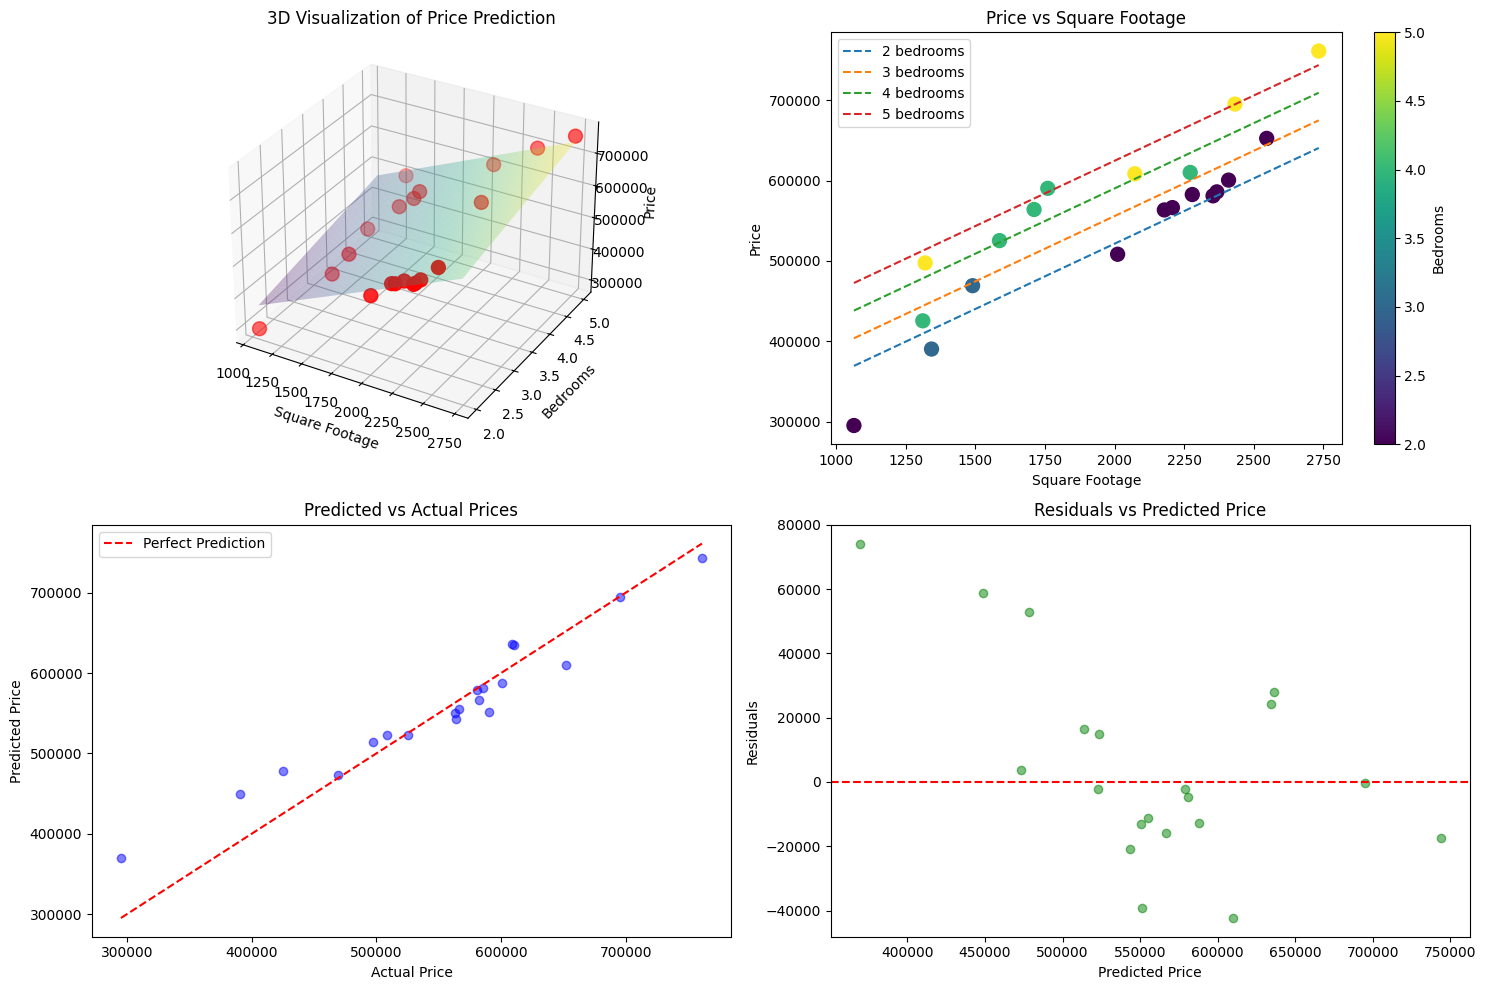


Model Performance Metrics:
Root Mean Square Error: $30,347.23
R-squared Score: 0.9118


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_regression_results(X_train, y_train, model, title="Housing Price Prediction"):
    """Create comprehensive visualization of regression results"""
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(15, 10))
    
    # 1. 3D Plot showing actual data points and prediction plane
    ax1 = fig.add_subplot(221, projection='3d')
    
    # Create mesh grid for prediction plane
    x_surf = np.linspace(min(x[0] for x in X_train), max(x[0] for x in X_train), 100)
    y_surf = np.linspace(min(x[1] for x in X_train), max(x[1] for x in X_train), 100)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    
    # Generate predictions for surface
    X_surf = [[x, y] for x, y in zip(x_surf.flatten(), y_surf.flatten())]
    z_surf = model.predict(X_surf)
    z_surf = np.array(z_surf).reshape(x_surf.shape)
    
    # Plot surface
    surf = ax1.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, cmap='viridis')
    
    # Plot actual points
    ax1.scatter([x[0] for x in X_train], [x[1] for x in X_train], y_train, 
                color='red', marker='o', s=100)
    
    ax1.set_xlabel('Square Footage')
    ax1.set_ylabel('Bedrooms')
    ax1.set_zlabel('Price')
    ax1.set_title('3D Visualization of Price Prediction')
    
    # 2. Price vs Square Footage (colored by bedrooms)
    ax2 = fig.add_subplot(222)
    scatter = ax2.scatter([x[0] for x in X_train], y_train, 
                         c=[x[1] for x in X_train], cmap='viridis', 
                         s=100)
    
    # Add prediction lines for different numbers of bedrooms
    unique_bedrooms = sorted(set(x[1] for x in X_train))
    x_range = np.linspace(min(x[0] for x in X_train), max(x[0] for x in X_train), 100)
    
    for bedrooms in unique_bedrooms:
        X_pred = [[x, bedrooms] for x in x_range]
        y_pred = model.predict(X_pred)
        ax2.plot(x_range, y_pred, '--', label=f'{bedrooms} bedrooms')
    
    ax2.set_xlabel('Square Footage')
    ax2.set_ylabel('Price')
    ax2.set_title('Price vs Square Footage')
    ax2.legend()
    plt.colorbar(scatter, label='Bedrooms')
    
    # 3. Predicted vs Actual Prices
    ax3 = fig.add_subplot(223)
    y_pred = model.predict(X_train)
    ax3.scatter(y_train, y_pred, color='blue', alpha=0.5)
    
    # Add perfect prediction line
    min_price = min(min(y_train), min(y_pred))
    max_price = max(max(y_train), max(y_pred))
    ax3.plot([min_price, max_price], [min_price, max_price], 'r--', label='Perfect Prediction')
    
    ax3.set_xlabel('Actual Price')
    ax3.set_ylabel('Predicted Price')
    ax3.set_title('Predicted vs Actual Prices')
    ax3.legend()
    
    # 4. Residuals Plot
    ax4 = fig.add_subplot(224)
    residuals = [pred - actual for pred, actual in zip(y_pred, y_train)]
    ax4.scatter(y_pred, residuals, color='green', alpha=0.5)
    ax4.axhline(y=0, color='r', linestyle='--')
    
    ax4.set_xlabel('Predicted Price')
    ax4.set_ylabel('Residuals')
    ax4.set_title('Residuals vs Predicted Price')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print numerical metrics
    mse = sum((pred - actual) ** 2 for pred, actual in zip(y_pred, y_train)) / len(y_train)
    rmse = mse ** 0.5
    mean_price = sum(y_train) / len(y_train)
    r2 = 1 - sum((pred - actual) ** 2 for pred, actual in zip(y_pred, y_train)) / \
            sum((actual - mean_price) ** 2 for actual in y_train)
    
    print("\nModel Performance Metrics:")
    print(f"Root Mean Square Error: ${rmse:,.2f}")
    print(f"R-squared Score: {r2:.4f}")

# Example usage with your existing code:
# Assuming you have already trained your model:
X_train, y_train = generate_housing_data(20)  # Generate more points for better visualization
model = LinearRegression()
model.fit_closedForm(X_train, y_train)

# Create the visualization
plot_regression_results(X_train, y_train, model)

In [10]:
odel = LinearRegression()
model.fit_openForm(X_train, y_train)

# Generate test data
X_test, y_test = generate_housing_data(3)

# Make predictions
predictions = model.predict(X_test)

# Print results
print("\nTraining Data:")
print("X (features):")
for i, features in enumerate(X_train):
    sqft, beds = features
    print(f"House {i + 1}: {sqft:.0f} sq.ft, {beds} bedrooms -> ${y_train[i]:,.2f}")

print("\nModel Parameters:")
print(f"Bias (θ₀): ${model.theta[0][0]:,.2f}")
print(f"Price per sq.ft (θ₁): ${model.theta[1][0]:,.2f}")
print(f"Price per bedroom (θ₂): ${model.theta[2][0]:,.2f}")

print("\nTest Predictions:")
for i, features in enumerate(X_test):
    sqft, beds = features
    print(f"House {i + 1}: {sqft:.0f} sq.ft, {beds} bedrooms")
    print(f"True price: ${y_test[i]:,.2f}")
    print(f"Predicted price: ${predictions[i]:,.2f}")
    print(f"Difference: ${predictions[i] - y_test[i]:,.2f}")



Training Data:
X (features):
House 1: 2279 sq.ft, 2 bedrooms -> $582,620.06
House 2: 1490 sq.ft, 3 bedrooms -> $469,142.52
House 3: 2353 sq.ft, 2 bedrooms -> $581,008.24
House 4: 1064 sq.ft, 2 bedrooms -> $295,115.96
House 5: 2011 sq.ft, 2 bedrooms -> $508,292.86
House 6: 2432 sq.ft, 5 bedrooms -> $695,233.90
House 7: 2179 sq.ft, 2 bedrooms -> $563,435.22
House 8: 1319 sq.ft, 5 bedrooms -> $497,445.83
House 9: 1311 sq.ft, 4 bedrooms -> $425,420.77
House 10: 1760 sq.ft, 4 bedrooms -> $590,332.28
House 11: 2207 sq.ft, 2 bedrooms -> $566,369.92
House 12: 2072 sq.ft, 5 bedrooms -> $608,514.52
House 13: 1586 sq.ft, 4 bedrooms -> $525,273.72
House 14: 2409 sq.ft, 2 bedrooms -> $600,594.26
House 15: 2546 sq.ft, 2 bedrooms -> $652,521.19
House 16: 2733 sq.ft, 5 bedrooms -> $761,220.51
House 17: 2271 sq.ft, 4 bedrooms -> $610,130.46
House 18: 1711 sq.ft, 4 bedrooms -> $563,989.97
House 19: 2367 sq.ft, 2 bedrooms -> $585,934.63
House 20: 1342 sq.ft, 3 bedrooms -> $390,285.25

Model Parameters:


Original X: [[2278.8535969157674, 2], [1489.7837076069525, 3], [2353.3989748458225, 2], [1063.5653589635672, 2], [2010.710576206725, 2], [2432.039225844807, 5], [2178.5313677518175, 2], [1319.3186327537803, 5], [1310.9589996235632, 4], [1759.8546012746747, 4], [2207.4520627337824, 2], [2072.4561829094014, 5], [1586.356562814186, 4], [2409.143672429847, 2], [2546.1366815773836, 2], [2732.967333510539, 5], [2271.3688885288, 4], [1710.541400455043, 4], [2367.0953310733344, 2], [1342.2772963961938, 3]]
Transposed X: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2278.8535969157674, 1489.7837076069525, 2353.3989748458225, 1063.5653589635672, 2010.710576206725, 2432.039225844807, 2178.5313677518175, 1319.3186327537803, 1310.9589996235632, 1759.8546012746747, 2207.4520627337824, 2072.4561829094014, 1586.356562814186, 2409.143672429847, 2546.1366815773836, 2732.967333510539, 2271.3688885288, 1710.541400455043, 2367.0953310733344, 1342.2772963961938], [2, 3, 2, 2, 2, 5, 2, 5, 4

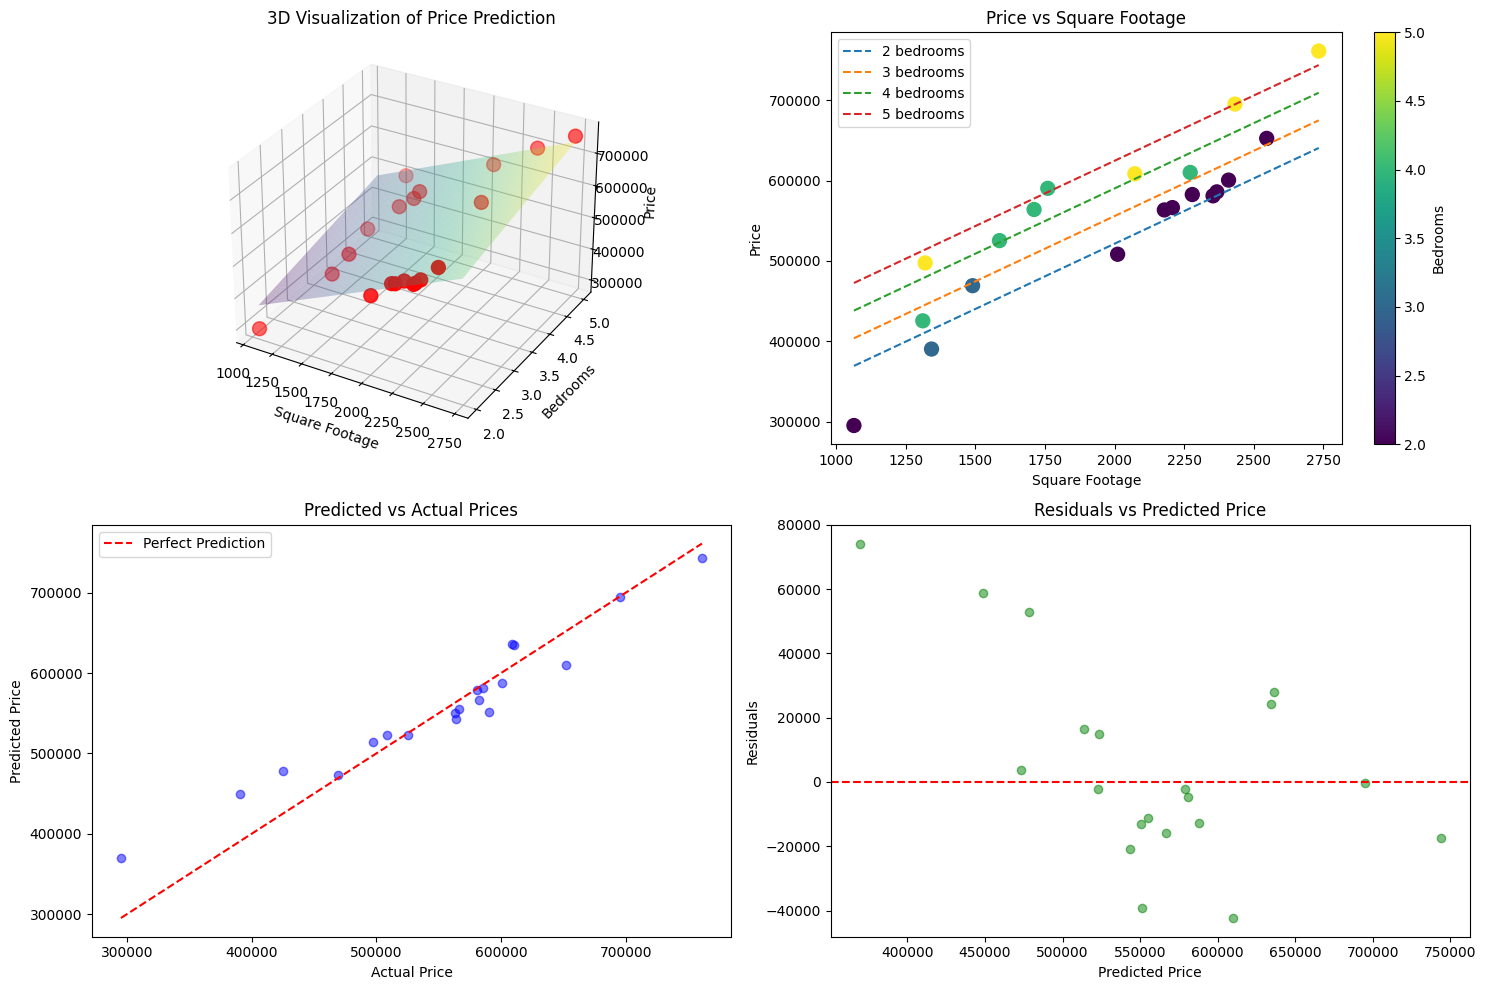


Model Performance Metrics:
Root Mean Square Error: $30,347.23
R-squared Score: 0.9118


In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_regression_results(X_train, y_train, model, title="Housing Price Prediction"):
    """Create comprehensive visualization of regression results"""
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(15, 10))
    
    # 1. 3D Plot showing actual data points and prediction plane
    ax1 = fig.add_subplot(221, projection='3d')
    
    # Create mesh grid for prediction plane
    x_surf = np.linspace(min(x[0] for x in X_train), max(x[0] for x in X_train), 100)
    y_surf = np.linspace(min(x[1] for x in X_train), max(x[1] for x in X_train), 100)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    
    # Generate predictions for surface
    X_surf = [[x, y] for x, y in zip(x_surf.flatten(), y_surf.flatten())]
    z_surf = model.predict(X_surf)
    z_surf = np.array(z_surf).reshape(x_surf.shape)
    
    # Plot surface
    surf = ax1.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, cmap='viridis')
    
    # Plot actual points
    ax1.scatter([x[0] for x in X_train], [x[1] for x in X_train], y_train, 
                color='red', marker='o', s=100)
    
    ax1.set_xlabel('Square Footage')
    ax1.set_ylabel('Bedrooms')
    ax1.set_zlabel('Price')
    ax1.set_title('3D Visualization of Price Prediction')
    
    # 2. Price vs Square Footage (colored by bedrooms)
    ax2 = fig.add_subplot(222)
    scatter = ax2.scatter([x[0] for x in X_train], y_train, 
                         c=[x[1] for x in X_train], cmap='viridis', 
                         s=100)
    
    # Add prediction lines for different numbers of bedrooms
    unique_bedrooms = sorted(set(x[1] for x in X_train))
    x_range = np.linspace(min(x[0] for x in X_train), max(x[0] for x in X_train), 100)
    
    for bedrooms in unique_bedrooms:
        X_pred = [[x, bedrooms] for x in x_range]
        y_pred = model.predict(X_pred)
        ax2.plot(x_range, y_pred, '--', label=f'{bedrooms} bedrooms')
    
    ax2.set_xlabel('Square Footage')
    ax2.set_ylabel('Price')
    ax2.set_title('Price vs Square Footage')
    ax2.legend()
    plt.colorbar(scatter, label='Bedrooms')
    
    # 3. Predicted vs Actual Prices
    ax3 = fig.add_subplot(223)
    y_pred = model.predict(X_train)
    ax3.scatter(y_train, y_pred, color='blue', alpha=0.5)
    
    # Add perfect prediction line
    min_price = min(min(y_train), min(y_pred))
    max_price = max(max(y_train), max(y_pred))
    ax3.plot([min_price, max_price], [min_price, max_price], 'r--', label='Perfect Prediction')
    
    ax3.set_xlabel('Actual Price')
    ax3.set_ylabel('Predicted Price')
    ax3.set_title('Predicted vs Actual Prices')
    ax3.legend()
    
    # 4. Residuals Plot
    ax4 = fig.add_subplot(224)
    residuals = [pred - actual for pred, actual in zip(y_pred, y_train)]
    ax4.scatter(y_pred, residuals, color='green', alpha=0.5)
    ax4.axhline(y=0, color='r', linestyle='--')
    
    ax4.set_xlabel('Predicted Price')
    ax4.set_ylabel('Residuals')
    ax4.set_title('Residuals vs Predicted Price')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print numerical metrics
    mse = sum((pred - actual) ** 2 for pred, actual in zip(y_pred, y_train)) / len(y_train)
    rmse = mse ** 0.5
    mean_price = sum(y_train) / len(y_train)
    r2 = 1 - sum((pred - actual) ** 2 for pred, actual in zip(y_pred, y_train)) / \
            sum((actual - mean_price) ** 2 for actual in y_train)
    
    print("\nModel Performance Metrics:")
    print(f"Root Mean Square Error: ${rmse:,.2f}")
    print(f"R-squared Score: {r2:.4f}")

# Example usage with your existing code:
# Assuming you have already trained your model:
X_train, y_train = generate_housing_data(20)  # Generate more points for better visualization
model = LinearRegression()
model.fit_closedForm(X_train, y_train)

# Create the visualization
plot_regression_results(X_train, y_train, model)